In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

## 로지스틱 회귀분류 모델

In [279]:
# 데이터 준비하기
# 'Species': 종류, 'Weight': 무게, 'Length': 길이, 'Diagonal': 대각선, 'Height': 높이, 'Width': 두께
fish = pd.read_csv('./data/05_생선_분류_데이터셋.csv')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [280]:
# 종류 특성의 고유한 값 조회하기
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [281]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [282]:
# 독립변수 추출하기
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_input = fish_input.to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [283]:
fish_target = fish['Species']
fish_target = fish_target.to_numpy()

In [284]:
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [285]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(fish_input, fish_target, random_state=42)

In [286]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(119, 5)
(119,)
(40, 5)
(40,)


In [287]:
print(len(train_input))
print(len(train_target))
print(len(test_input))
print(len(test_target))

119
119
40
40


In [288]:
# 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [289]:
print(ss.mean_)
print(ss.scale_)

[393.27226891  28.49663866  31.2697479    8.86248403   4.44828655]
[355.27097574  10.67118899  11.5129708    4.04941829   1.64047206]


In [290]:
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [110]:
# KNN모델로 테스트
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print('KNN모델 훈련데이터 정확도 :', round(kn.score(train_scaled, train_target),3))
print('KNN모델 테스트데이터 정확도 :', round(kn.score(test_scaled, test_target),3))

# <해석>
# 훈련정확도는 0.891로 좋은편이지만
# 테스트 데이터와의 오차가 -0.4 정도로 과대적합이 의심된다

KNN모델 훈련데이터 정확도 : 0.891
KNN모델 테스트데이터 정확도 : 0.85


In [111]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [112]:
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [117]:
test_result = [[true, pred] for true, pred in zip(test_target[:5],kn.predict(test_scaled[:5]))]

In [118]:
test_result

[['Perch', 'Perch'],
 ['Smelt', 'Smelt'],
 ['Pike', 'Pike'],
 ['Whitefish', 'Perch'],
 ['Perch', 'Perch']]

In [121]:
np.column_stack((test_target[:5], kn.predict(test_scaled[:5])))

array([['Perch', 'Perch'],
       ['Smelt', 'Smelt'],
       ['Pike', 'Pike'],
       ['Whitefish', 'Perch'],
       ['Perch', 'Perch']], dtype=object)

In [137]:
# 각 행의 범주들의 확률값 확인
    # - 확률값의 범위 : 0 ~ 1(0% ~ 100%)
    # - 확률값 조회함수 : predict_proba(테스트데이터)
    # - 사이킷런 분류 모델 공통으로 사용
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [141]:
# 기존의 종속변수 리스트
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [140]:
# 훈련모델이 가지고있는 종속변수 리스트
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [164]:
# 사용된 이웃값 확인하기
# - 첫번째 값 : n_neighbors의 값
# - 두번째 값 : 첫번째 값의 인덱스 번호
distances, indexes = kn.kneighbors(test_scaled[:5])
print(distances)
print()
print(indexes)

[[0.13880285 0.15188629 0.15908025]
 [0.07310337 0.10341686 0.11506625]
 [0.63337713 0.80646808 0.82050896]
 [0.20774583 0.24862983 0.33682411]
 [0.17898697 0.1859878  0.19013472]]

[[ 39  64  63]
 [ 93  99  43]
 [100 105  27]
 [104 115 106]
 [ 72  26  68]]


In [165]:
# 이웃값 확인하기 1
train_target[indexes]

array([['Perch', 'Perch', 'Perch'],
       ['Smelt', 'Smelt', 'Smelt'],
       ['Pike', 'Pike', 'Pike'],
       ['Roach', 'Perch', 'Perch'],
       ['Perch', 'Perch', 'Roach']], dtype=object)

In [166]:
# 이웃값 확인하기 2
for test_data in test_scaled[:5]:
    distances, indexes = kn.kneighbors([test_data])
    print(train_target[indexes])

[['Perch' 'Perch' 'Perch']]
[['Smelt' 'Smelt' 'Smelt']]
[['Pike' 'Pike' 'Pike']]
[['Roach' 'Perch' 'Perch']]
[['Perch' 'Perch' 'Roach']]


## 로지스틱 회귀분류(Logistic Regression)

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
# 선형방정식 사용 : 다중회귀 방정식과 동일
# z = a * x1 + b * x2... + y절편
# z값 구하는 함수 : decision_function(훈련데이터)
# z값 범위 : 0보다 작거나 큼
# 확률 : 0 ~ 1 사이의 값을 사용(0% ~ 100%)
# 따라서, z값은 확률의 0 ~ 1 사이의 값으로 변환하는 작업이 필요
# 시그모이드 방식(이진분류방식 사용) = 두가지 범주(0, 1)
# 소프트맥스 방식(다중분류방식 사용) = 모든 범주의 확률을 0, 1로 변환 

### 로지스틱 회귀로 이진분류하기
#### 시그모이드 함수 사용

In [173]:
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [174]:
train_target[:5]

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki'], dtype=object)

In [180]:
# 이진분류방식은 2개의 범주만 사용가능
    # - 기존 데이터에서 2개(Bream, Smelt)범주만 추출하여 사용
    # 독립변수명 : train_bream_smelt
    # 종속변수명 : target_bream_smelt
target_bream_smelt = fish['Species']

In [309]:
# 데이터 프레임에서 추출하는 방법
bream_smelt = fish[(fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')]

In [310]:
train_bream_smelt = bream_smelt[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
target_bream_smelt = bream_smelt['Species']

In [311]:
train_bream_smelt = train_bream_smelt.to_numpy()
target_bream_smelt = target_bream_smelt.to_numpy()

In [312]:
# 배열에서 추출하는 방법
target_bream_smelt = train_target[(train_target == 'Bream') | (train_target == 'Smelt')]

In [313]:
train_bream_smelt = train_scaled[(train_target == 'Bream') | (train_target == 'Smelt')]

In [314]:
print(train_bream_smelt.shape)
print(target_bream_smelt.shape)

(33, 5)
(33,)


In [322]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(train_bream_smelt, target_bream_smelt)
print(logr.score(train_bream_smelt, target_bream_smelt))

1.0


In [323]:
logr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [329]:
# 5개 행에 대한 범주별 확률 조회
    # - 확률값의 범위 : 0 ~ 1(0% ~ 100%)
    # - 확률값 조회함수 : predict_proba(테스트데이터)
    # - 사이킷런 분류 모델 공통으로 사용
proba = logr.predict_proba(train_bream_smelt[:5])
np.round(proba, decimals=4)

array([[0.9976, 0.0024],
       [0.0274, 0.9726],
       [0.9949, 0.0051],
       [0.9858, 0.0142],
       [0.9977, 0.0023]])

In [328]:
# 훈련모델이 가지고있는 범주 순서
print(logr.classes_)

['Bream' 'Smelt']


In [330]:
# 계수(또는 가중치) 및 y절편값 조회하기
print(logr.coef_, logr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [332]:
# -0.4037798 * Diagonal + -0.5762020 * Height + -0.66280298 * Length + -1.01290277 * Weight + -0.73168947 * Width + -2.16155132

In [335]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0 ~ 1 로 변환
# z값 조회하기
decisions = logr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [336]:
# 시그모이드 함수 : scipy패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [339]:
# 시그모이드함수(sigmoid function) 또는 로지스틱 함수 - 이진분류
    # - 범주가 2개일 때 주로 사용됨
    # - 사용패키지 : from scipy.special
    # - 사용모듈 : import expit
    # - 사용함수 : expit(z값)
    
# - 0/1, Y/N 등 둘중 하나로 분류할때 (기존 KNN)
# - 시그모이드 값의 범위 : 0 ~ 1 의 사잇값(0% ~ 100%)
# - 범주들의 z값을 기준으로 0과 1의 사잇값으로 변환하여 반환한다.

# - 변환 공식 : 1 / (1 + np.exp^(-z))
    # np.exp() : 지수값으로 변화하는 함수
    # -z : z값은 음수 사용
    # z = 0 일때, 확률은 0.5(50%)
    # z > 0 일때, 확률은 > 0.5(51% 이상) -> 예측확률높음
    # z < 0 일때, 확률은 < 0.5(49% 미만)
    # 여러 범주들 중에 확률이 가장 높은 범주 선택

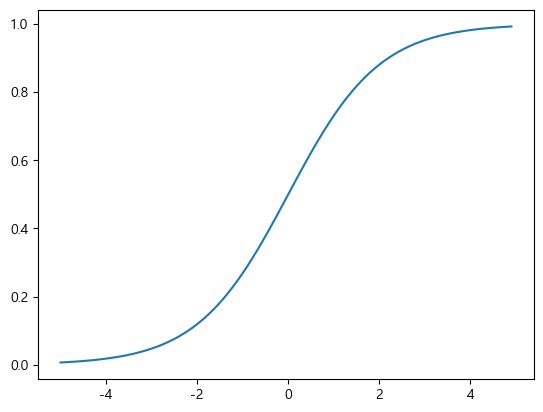

In [357]:
# 시그모이드 함수 예시

# 임의의 z값
z = np.arange(-5, 5, 0.1)

# 시그모이드 공식 사용
    # np.exp() : 0 ~ 1 지수로 변환하기
    #          : z값의 스케일을 통일 시키기 위해서
    #          : z값은 음수로 처리(제곱승 시에 분모로 계산)
    #          : 2^(-2) = 1/(2^2), 2^0 = 1
    
phi = 1 / (1 + np.exp(-z))

# fig = plt.figure(figsize=(8,5))
plt.plot(z, phi)
plt.show()

## 다중분류

In [ ]:
# 다중분류는 모든 범주를 사용합니다
    # - 독립변수도 모든 특성을 사용합니다
    # - 모든 특성을 사용할 경우 복잡도 고려 (너무 복잡 X, 너무 느슨 X, 적당히)
    # - 사용하는 클래스 : 이진분류와 동일
    # - 복잡도를 강약으로 조절히기 위해 규제강도 조절값 사용
    # - 규제강도 조절값 속성명 : C(대문자), 기존의 alpha
    # - 훈련반복 횟수 사용
        # - 훈련모델은 정확도를 높이기 위해 일반적으로 반복수행을 함
        # - 기본 반복횟수 : 100회
        # - 훈련중에 100회보다 더 해야하는 경우 경고창이 뜰 수 있음
        # - 독립변수의 특성이 많을수록 훈련 반복횟수가 늘어나는 경우 발생
        # - 반복횟수 속성값 : max_iter
        # - 보통 반복횟수를 1000으로 놓고 진행하는 경우가 많음
    # - 이외 모든 훈련 함수는 기존과 동일

In [390]:
# 규제강도 = 20
# 반복횟수 1000회
# 훈련데이터와 테스트데이터에 대한 정확도 확인하기

In [397]:
logr = LogisticRegression(C=20, max_iter=1000)
logr.fit(train_scaled, train_target)
print('훈련데이터 정확도 :', logr.score(train_scaled, train_target))
print('테스트데이터 정확도 :', logr.score(test_scaled, test_target))

훈련데이터 정확도 : 0.9327731092436975
테스트데이터 정확도 : 0.925


In [408]:
# 상위 5건 예측
logr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [407]:
# 전체 범주별 확률 확인
proba = logr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals= 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [410]:
print(logr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [414]:
# 계수(또는 가중치) 및 y절편값 조회하기
print(logr.coef_)
print()
print(logr.intercept_)

[[-1.49001999 -1.02912482  2.59345218  7.70357843 -1.2007022 ]
 [ 0.19618201 -2.01068627 -3.77976461  6.50491598 -1.99482485]
 [ 3.56279819  6.34356926 -8.48970993 -5.757574    3.79307177]
 [-0.10458121  3.603196    3.93067836 -3.61737079 -1.75069674]
 [-1.40061524 -6.07503319  5.25969396 -0.87219889  1.86043687]
 [-1.38526189  1.49214385  1.39226012 -5.67734222 -4.40097623]
 [ 0.62149812 -2.32406483 -0.9066101   1.71599149  3.69369137]]

[-0.09205181 -0.26290863  3.25101315 -0.14742819  2.65498377 -6.78783248
  1.38422419]


In [416]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0 ~ 1 로 변환
# z값 조회하기
decisions = logr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=3))

[[ -6.498   1.032   5.164  -2.729   3.339   0.327  -0.634]
 [-10.859   1.927   4.771  -2.398   2.978   7.841  -4.26 ]
 [ -4.335  -6.233   3.174   6.487   2.358   2.421  -3.872]
 [ -0.683   0.453   2.647  -1.187   3.265  -5.753   1.259]
 [ -6.397  -1.993   5.816  -0.11    3.503  -0.112  -0.707]]


In [419]:
# 소프트맥스(softmax)
    # 사용하는 패키지 : scipy.special
    # 사용하는 모듈 : softmax

from scipy.special import softmax
proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [422]:
print(logr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [423]:
print(logr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
